In [1]:
! pip install stable_baselines3
! pip install Box2D

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 69.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 93.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [3]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.callbacks import  EvalCallback

In [4]:
env = gym.make("LunarLander-v3")
print(env.observation_space.shape[0])
print(env.action_space.n)

8
4


In [5]:
env = DummyVecEnv([lambda: env])

In [6]:
eval_env = env = gym.make("LunarLander-v3")

In [10]:
model = PPO('MlpPolicy', env, verbose = 1)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [11]:
eval = EvalCallback(eval_env, best_model_save_path='/content/result', log_path='./logs/', eval_freq=10000, deterministic=True,render=False)

In [12]:
model.learn(total_timesteps=500_000, callback=eval)

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 90.1     |
|    ep_rew_mean     | -161     |
| time/              |          |
|    fps             | 452      |
|    iterations      | 1        |
|    time_elapsed    | 4        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 91.6        |
|    ep_rew_mean          | -158        |
| time/                   |             |
|    fps                  | 415         |
|    iterations           | 2           |
|    time_elapsed         | 9           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.005118125 |
|    clip_fraction        | 0.0105      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.38       |
|    explained_variance   | 0.0022      |
|    learning_rate        | 0.

/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
| train/                  |             |
|    approx_kl            | 0.007263102 |
|    clip_fraction        | 0.0715      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.04       |
|    explained_variance   | 0.126       |
|    learning_rate        | 0.0003      |
|    loss                 | 59.2        |
|    n_updates            | 260         |
|    policy_gradient_loss | -0.00825    |
|    value_loss           | 173         |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 298         |
|    ep_rew_mean          | -64.9       |
| time/                   |             |
|    fps                  | 381         |
|    iterations           | 28          |
|    time_elapsed         | 150         |
|    total_timesteps      | 57344       |
| train/                  |             

In [17]:
num_episodes = 20
total_rewards = []

for episode in range(num_episodes):
    obs, _ = env.reset()
    episode_reward = 0
    done = False

    while not done:

        action, state = model.predict(obs, deterministic=True)

        obs, reward, terminated, truncated, _ = env.step(action)

        done = terminated or truncated

        episode_reward += reward

    total_rewards.append(episode_reward)
    print(f"Episode{episode + 1}: Reward = {episode_reward}")

mean_reward = np.mean(total_rewards)
std_reward = np.std(total_rewards)
print(f"Rewards of {num_episodes} Episodes: {mean_reward} ± {std_reward}")


Episode1: Reward = 162.09088648829206
Episode2: Reward = -110.28424727463086
Episode3: Reward = -115.4029970325754
Episode4: Reward = 184.83591574312487
Episode5: Reward = -61.45624071999321
Episode6: Reward = 192.21479841500133
Episode7: Reward = 161.69096516279575
Episode8: Reward = 194.84087945864766
Episode9: Reward = -81.9518766732612
Episode10: Reward = 119.53237863926904
Episode11: Reward = 192.08942068406876
Episode12: Reward = -35.40028950728782
Episode13: Reward = -151.3726989230361
Episode14: Reward = 99.04134955505585
Episode15: Reward = -51.256073017716446
Episode16: Reward = 103.54946721406394
Episode17: Reward = 112.76411903614157
Episode18: Reward = 158.81647395587436
Episode19: Reward = 155.72105350836938
Episode20: Reward = 65.75219681088981
Rewards of 20 Episodes: 64.79077407615466 ± 118.01073836856978


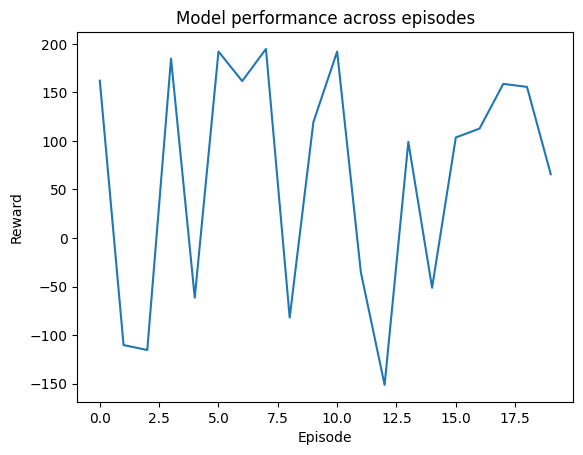

In [21]:
plt.plot(total_rewards)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Model performance across episodes')
plt.show()

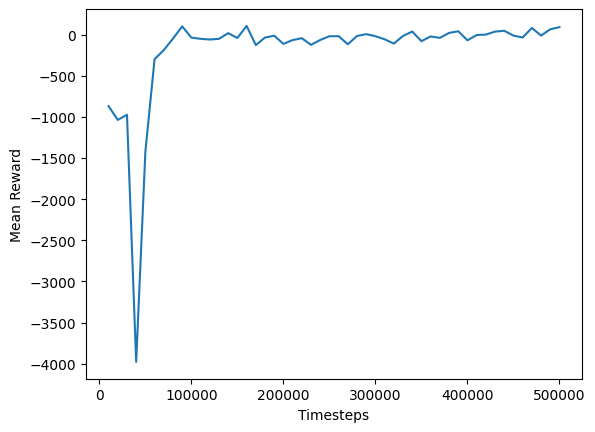

In [20]:
data = np.load('/content/logs/evaluations.npz')

timesteps = data['timesteps']
results = data['results']
mean = np.mean(results, axis=1)

plt.plot(timesteps, mean)
plt.xlabel('Timesteps')
plt.ylabel('Mean Reward')
plt.show()